Real talk, had to look up a lot for doing this one folks.

# What is Machine Learning (ML) ?
Machine Learning is the science of making computers learn from data without explicitly programming them. 

It can be- supervised, unsupervised and reinforcement type learning.


## ML Workflow

1. Load data
2. Understand and explore data
3. Preprocess (handle missing values, scale, encode)
4. Split into training/test sets
5. Train a model
6. Evaluate the model
7. Improve or tune the model


## Scikit-learn
`scikit-learn` is the library we'll use to learn and build ML models in Python. 
Install it using `pip install scikit-learn` in cmd.

### Iris Dataset
For learning, we'll use the built-in Iris Dataset from the scikit-learn library. 
This will be our first ML Dataset.

In [1]:
from sklearn.datasets import load_iris

Load it up.

In [2]:
iris=load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Let's try one.

In [3]:
print(iris.data[:5])        #fist five

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Okay, one more.

In [4]:
print(iris.DESCR)           #details, to undestand the dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Now that we are familiar with the Iris Dataset-

## Convert to DataFrame

In [5]:
import pandas as pd
df= pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target']= iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


... and explore it some more.

In [6]:
print("Describing the dataframe: ")
print(df.describe())

print("Value counts: ")
print(df['target'].value_counts())


Describing the dataframe: 
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
Value counts: 
target
0    50
1    50
2    50

---

## Supervised Learning with Scikit-Learn (Iris Dataset)

Focusing on the core supervised learning process of the Iris dataset.

### Splitting into Training and Testing Sets

In [7]:
from sklearn.model_selection import train_test_split

# let features(X) and target(Y)
X= df.drop('target', axis=1)        #uppercase X for input (& independent) variables- by convention
y= df['target']                      # lowercase y for output (& dependant) variables- by convention

#split (80% train , 20% test)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#random_state=42 ensures dataset split remains consistent across runs
#42 is just a random integer (iykyk), write whatever.


print("Train shape: ", X_train.shape)
print("Test shape: ", X_test.shape)

Train shape:  (120, 4)
Test shape:  (30, 4)


Nicely split, nice ;)

### Train the model ( Logistic Regression )

In [8]:
from sklearn.linear_model import LogisticRegression

#creating model
model= LogisticRegression(max_iter=200)

#fit to the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Just trained my first machine learning model. Fu- *coughs* Hell yeah.

That's it.

Mark1. I'm calling it Mark1.

### Evaluating model "Mark1"

In [9]:
from sklearn.metrics import accuracy_score, classification_report

#prediction on test set
y_pred= model.predict(X_test)

#accuracy score
print("Accuracy in Mark1: ",accuracy_score(y_test,y_pred))

#finally, report
print(classification_report(y_test, y_pred, target_names= iris.target_names))

Accuracy in Mark1:  1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Visualizing Confusion Matrix
It's a table used to evaluate the performance of a classification model.

It compares the model's predictions with the actual results, helping us 'see' what we need.

Useful for dealing with imbalanced datasets ( where accuracy can be misleading .)

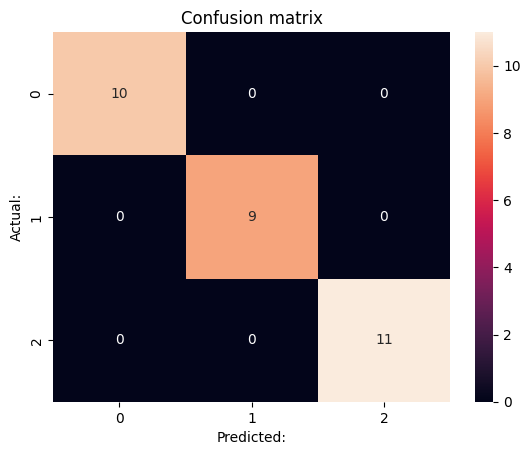

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt

cm= confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

plt.xlabel("Predicted:")
plt.ylabel("Actual:")
plt.title("Confusion matrix")
plt.show()

Now, for this day, only the last part remains. Finishing strong!

## Cross-Validation (CV)
This helps us assess how well out model generalizes to unseen data. 

Prevents overfitting.

More trustable while estimating real-world performance.

Useful when data is limited.



In [15]:
from sklearn.model_selection import cross_val_score

#using CV with 5 folds
cv_scores= cross_val_score(model, X, y, cv=5)
print("cross validation score: ", cv_scores)
print("average cv score: ", cv_scores.mean())

cross validation score:  [0.96666667 1.         0.93333333 0.96666667 1.        ]
average cv score:  0.9733333333333334


## Confusion Matrix- in depth
We've already plotted it, now, to interpret it.

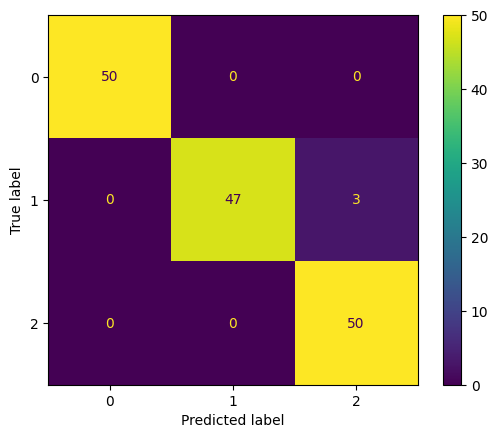

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#just to be sure, predict again
y_pred= model.predict(X)

#matrix and plot
cm=confusion_matrix(y, y_pred, labels= model.classes_)

disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

Here, we can read the table now!

See if data points are correctly classified or misclassified.

## Save Model (Mark1)

In [17]:
import joblib

#save it
joblib.dump(model,'iris_model.pkl')

['iris_model.pkl']

## Load Model (Mark1)

In [18]:
#to load it, anywhere, use

loaded_model= joblib.load('iris_model.pkl')
print("Model Loaded Successfully.")

Model Loaded Successfully.


Day 4: FINISHES. ( Took me two days to make this! WOW!)